In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df['reserved_room_type'] = df['reserved_room_type'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'P':8,'L':9})

In [5]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [6]:
df['deposit_type'] = df['deposit_type'].map({'No Deposit':0,'Non Refund':1,'Refundable':2})

In [7]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0,'City Hotel':1})

In [8]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':0,'February':1,'March': 2,'Ápril':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11})

In [9]:
df['total'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total
0,0,0,342,2015,6.0,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,0,0,737,2015,6.0,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,0,0,7,2015,6.0,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,0,0,13,2015,6.0,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,0,0,14,2015,6.0,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,7.0,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,1,0,102,2017,7.0,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,1,0,34,2017,7.0,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,1,0,109,2017,7.0,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              108301 non-null  float64
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Finding out the correlalation in the data

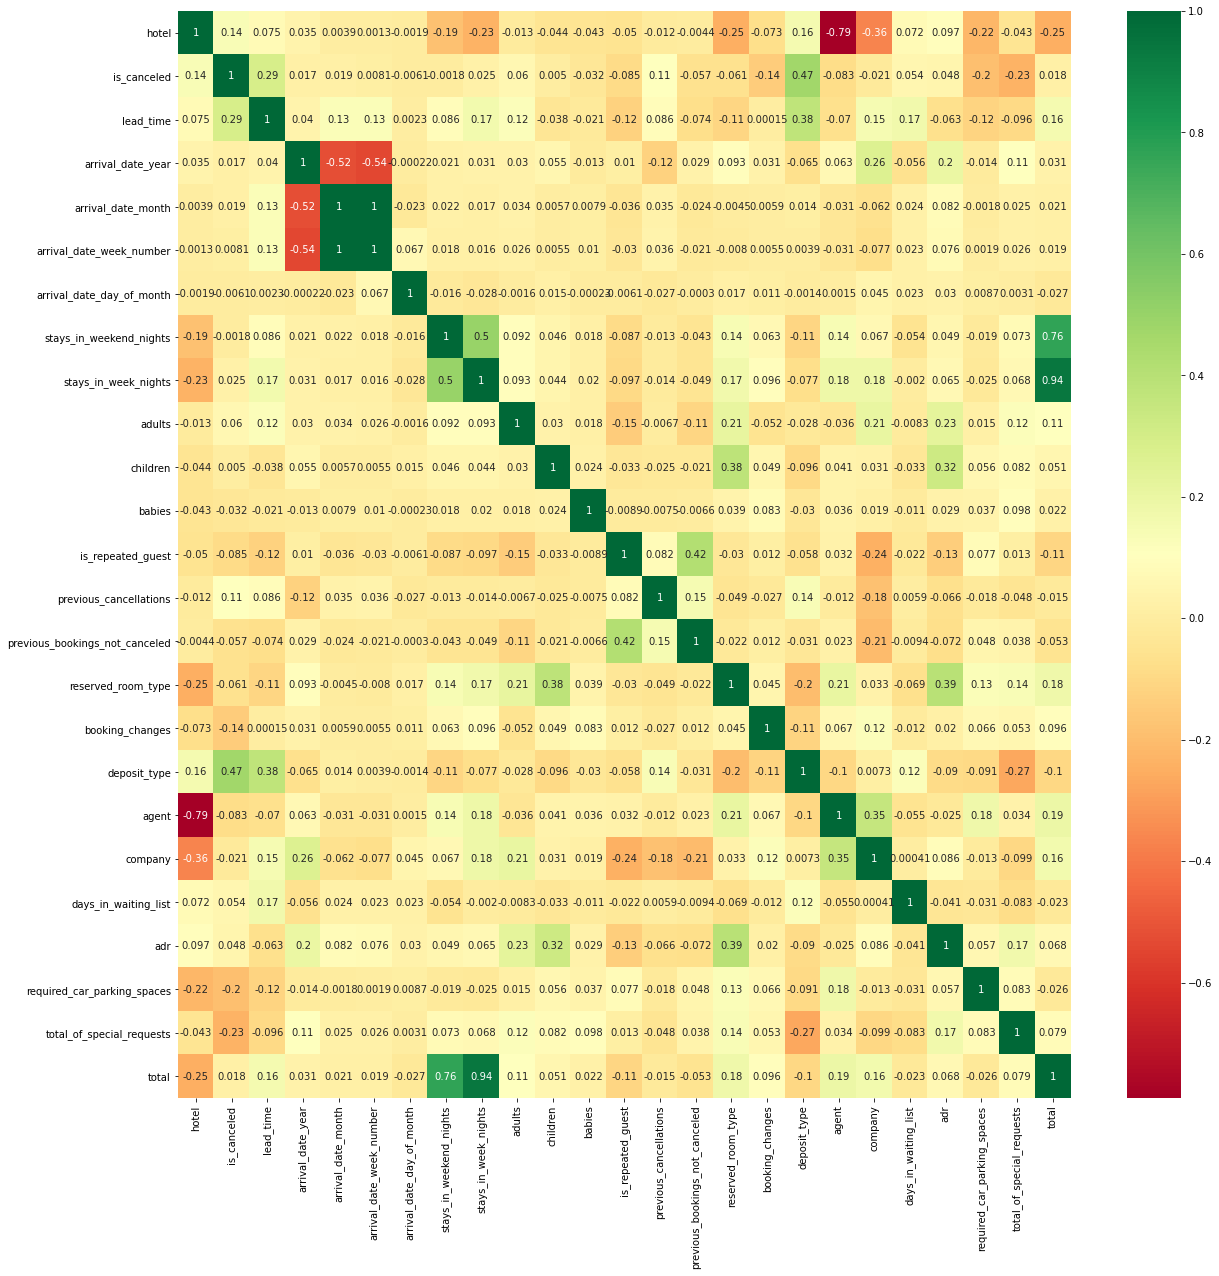

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Text(0, 0.5, 'Number')

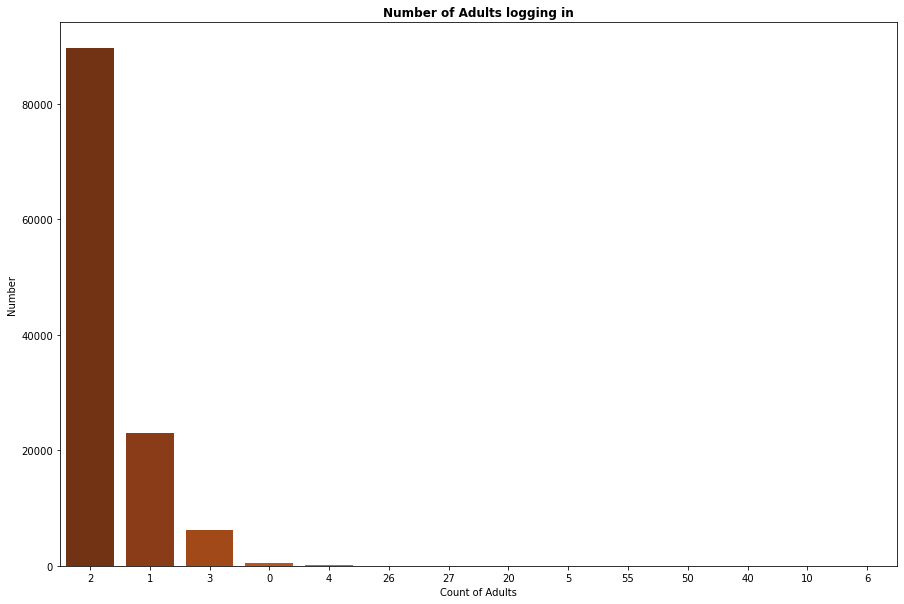

In [24]:

plt.figure(figsize=(15,10))
sns.countplot(x='adults', data = df,
              order=pd.value_counts(df['adults']).index, palette='YlOrBr_r')
plt.title('Number of Adults logging in', weight='bold')
plt.xlabel('Count of Adults', fontsize=10)
plt.ylabel('Number', fontsize=10)

Lead time relation with the cancellation

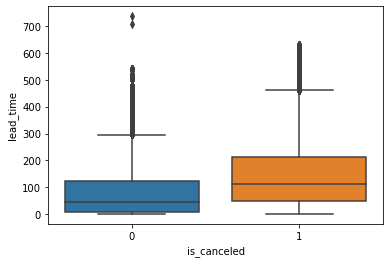

In [14]:
sns.boxplot(x='is_canceled',y='lead_time',data=df)

In [15]:
df['deposit_type'].value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

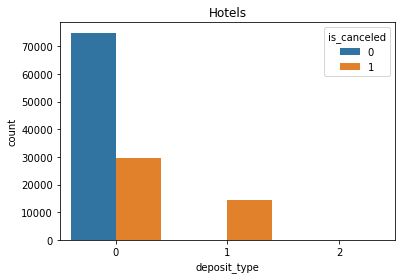

In [16]:
s = sns.countplot(x='deposit_type', hue='is_canceled', data=df)
s.set_title("Hotels")
plt.show(s)

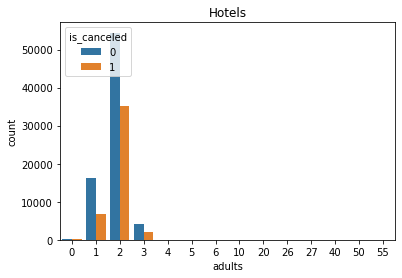

In [17]:
s = sns.countplot(x='adults', hue='is_canceled', data=df)
s.set_title("Hotels")
plt.show(s)

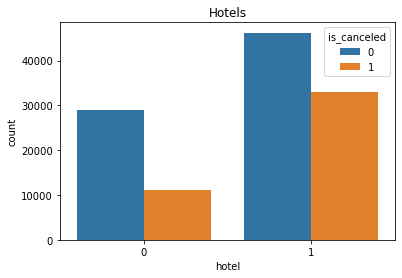

In [18]:
s = sns.countplot(x='hotel', hue='is_canceled', data=df)
s.set_title("Hotels")
plt.show(s)

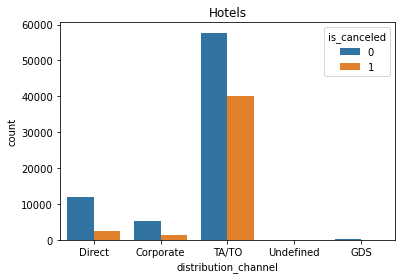

In [19]:
s = sns.countplot(x='distribution_channel', hue='is_canceled', data=df)
s.set_title("Hotels")
plt.show(s)

In [20]:
data = df[['hotel','lead_time','stays_in_week_nights','stays_in_weekend_nights','adults','reserved_room_type','adr'
                          ,'is_canceled']]

In [21]:
y = data["is_canceled"]
x = data.drop(labels = ["is_canceled"],axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

model = RandomForestClassifier(random_state=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9768473953319748
Testing Accuracy : 0.7913145003680296
